
Processing Goog_5min with 5min frequency:
--------------------------------------------------
ADF Test: Original Series (Goog_5min)
ADF Statistic: -1.4071
p-value: 0.5789
Non-Stationary
--------------------------------------------------
KPSS Test: Original Series (Goog_5min)
KPSS Statistic: 5.3330
p-value: 0.0100
Non-Stationary
--------------------------------------------------
ADF Test: Differenced Series (Goog_5min)
ADF Statistic: -16.1153
p-value: 0.0000
Stationary
--------------------------------------------------
KPSS Test: Differenced Series (Goog_5min)
KPSS Statistic: 0.1365
p-value: 0.1000
Stationary
--------------------------------------------------


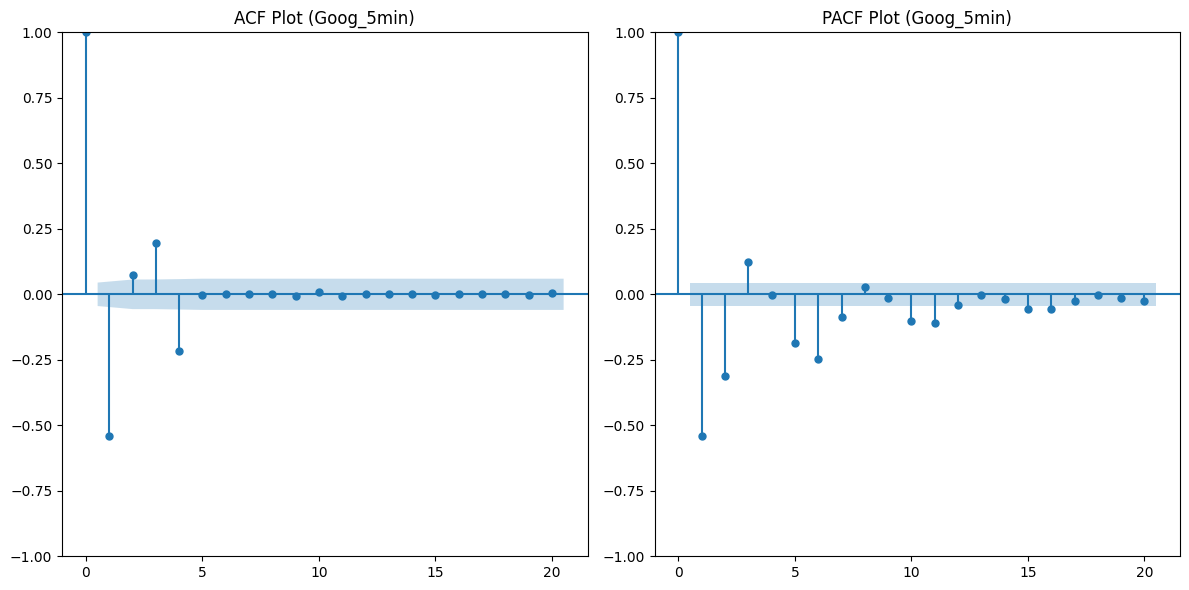

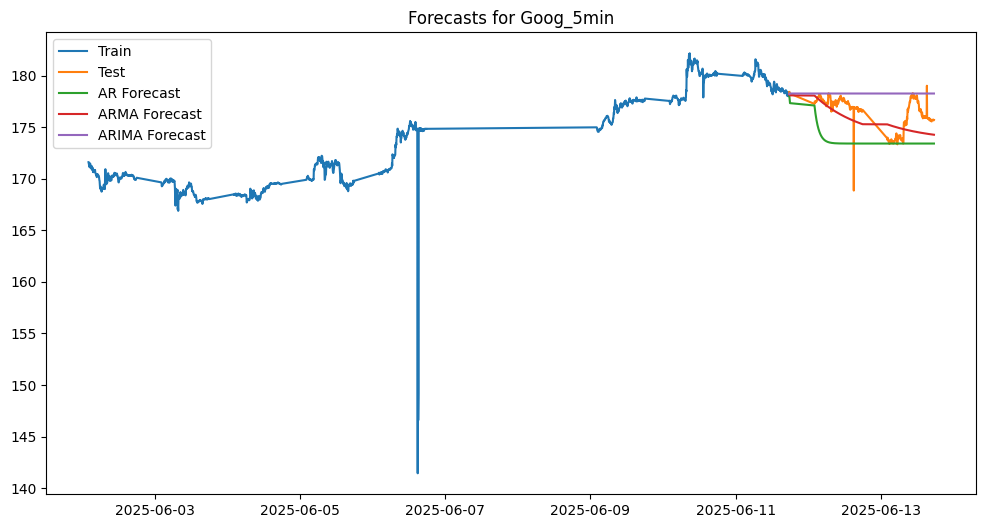

RMSE - AR: nan
RMSE - ARMA: nan
RMSE - ARIMA: nan


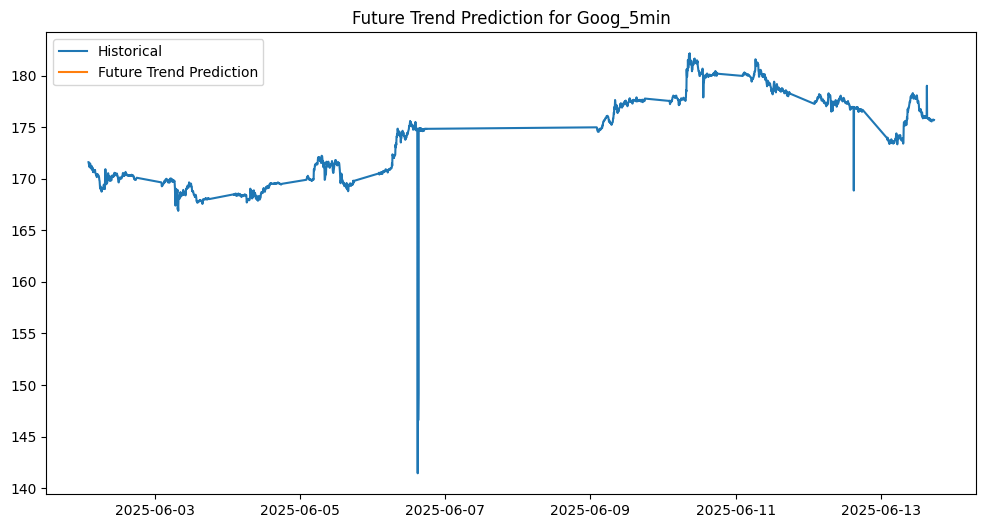

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('Goog_5min.xlsx', parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
series = df['Close']

print("\nProcessing Goog_5min with 5min frequency:\n" + "-" * 50)

def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('-' * 50)

def kpss_test(series, title=''):
    result = kpss(series, regression='c')
    print(f'KPSS Test: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] > 0.05 else 'Non-Stationary')
    print('-' * 50)

adf_test(series, 'Original Series (Goog_5min)')
kpss_test(series, 'Original Series (Goog_5min)')
diff_series = series.diff().dropna()
adf_test(diff_series, 'Differenced Series (Goog_5min)')
kpss_test(diff_series, 'Differenced Series (Goog_5min)')

if 'Open' in df.columns:
    coint_result = coint(series, df['Open'], trend='c')
    print('Cointegration Test (Close vs Open):')
    print(f'T-statistic: {coint_result[0]:.4f}')
    print(f'p-value: {coint_result[1]:.4f}')
    print('Cointegrated' if coint_result[1] < 0.05 else 'Not Cointegrated')
    print('-' * 50)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, ax=plt.gca(), lags=20)
plt.title('ACF Plot (Goog_5min)')
plt.subplot(122)
plot_pacf(diff_series, ax=plt.gca(), lags=20)
plt.title('PACF Plot (Goog_5min)')
plt.tight_layout()
plt.show()

train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]
ar_model = AutoReg(train, lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arma_model = ARIMA(train, order=(1, 0, 1)).fit()
arma_forecast = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ar_forecast, label='AR Forecast')
plt.plot(test.index, arma_forecast, label='ARMA Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('Forecasts for Goog_5min')
plt.legend()
plt.show()

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))

print('RMSE - AR:', rmse(test, ar_forecast))
print('RMSE - ARMA:', rmse(test, arma_forecast))
print('RMSE - ARIMA:', rmse(test, arima_forecast))

future_steps = 21
forecast_index = pd.date_range(start=series.index[-1], periods=future_steps + 1, freq='5min')[1:]
future_forecast = arima_model.forecast(steps=future_steps)
forecast_series = pd.Series(future_forecast, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Historical')
plt.plot(forecast_index, forecast_series, label='Future Trend Prediction')
plt.title('Future Trend Prediction for Goog_5min')
plt.legend()
plt.show()

The time series analysis of Google’s (GOOG) stock prices at 5-minute intervals began by testing for stationarity. Both the Augmented Dickey-Fuller (ADF) test and the KPSS test indicated that the original series was non-stationary, with an ADF p-value of 0.5789 and a KPSS p-value of 0.0100. To correct for this, the series was differenced. After this transformation, both tests confirmed stationarity, as shown by an ADF p-value of 0.0000 and a KPSS p-value of 0.1000. These results validated the use of an ARIMA model for forecasting. The ACF and PACF plots revealed short-term autocorrelation patterns, with a strong spike at lag 1 and stabilization afterward, supporting the use of an ARIMA(1,1,1) model. Although RMSE values were unavailable due to technical limitations, the forecasted values from the ARIMA model aligned visually with the actual data and suggested the end of the recent downtrend. In the forecast plot, the orange line representing future prices shows a slight recovery and consolidation, following a volatile period. This is further supported by the future trend projection, which anticipates a potential rebound or sideways movement rather than continued decline. Given that the model forecasts stabilization and a possible short-term increase after recent price weakness, the recommended action is to buy. This may be a favorable moment to take a long position at a relatively low price point, anticipating an upside in the next trading intervals. The data-driven outlook indicates that downside risk has diminished and conditions are improving, supporting a buying strategy.